# The Perceptron Learning Algorithm  

A perceptron classifier is a simple model of a neuron. This supervised learning classifier seeks to divide the two classes by a linear separator, where the separator is a (n-1)-dimensional hyperplane in a n-dimensional space, in particular it is a line in the plane and a plane in the 3-dimensional space.  

The learning algorithm for the perceptron is online, meaning that instead of considering the entire data set at the same time, it only looks at one example at a time, processes it and goes on to the next one. 

The algorithm starts with a guess for the vector W (without loss of generalization one can begin with a vector of zeros). It then assesses how good of a guess that is by comparing the predicted labels with the actual, correct labels. As long as there are misclassified points, the algorithm corrects its guess for the weight vector by updating the weights in the correct direction, until all points are correctly classified.  

The dot product of a given set vector of weights and inputs can be describes as the following:

![](extras/perceptron_output.png)

This dot product is subsequently run through the simply unit step function wihcih determines the predicted label for a given observation:

![](extras/unit_step.png)

The weights are then adjusted by the multiplying the difference between the correct and predicted outcome by the given x, and then multiplying that by the learning rate, η.

![](extras/perceptron_increment.png)

The algorithm stops updating the weights as soon as all samples are classified correctly. Our intuition tells us that a decision boundary with a large margin between the classes likely has a better generalization error, however, the perceptron doesn't seek to maximize the margin.

A good practice with the Perceptron algorithm is to normalize the input data. It is not only easier to find an appropriate learning rate if the features are on the same scale, but it also often leads to faster convergence and can prevent the weights from becoming too small (numerical stability). 

Unfortunately, the perceptron learning rule converges if the two classes can be separated by a linear hyperplane, but problems arise if the classes cannot be separated perfectly by a linear classifier.  Because of this convergence issue, we might generally specify the number of iterations through the dataset (epochs). 

In [21]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [22]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Weights: [-0.4  -0.68  1.82]


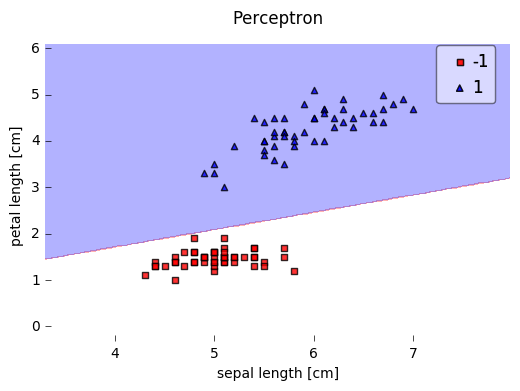

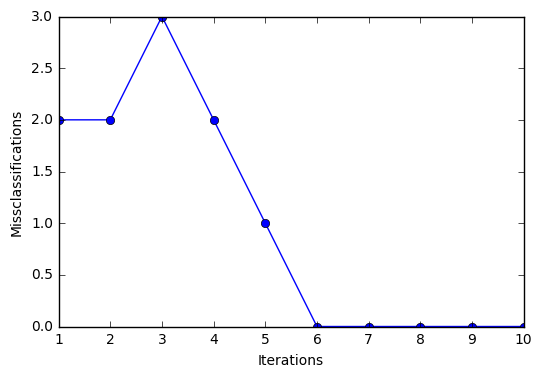

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()

## References

- http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
- https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/
- https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
- http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/